In [3]:
# Importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta
import os
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.filterwarnings('ignore')

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models

In [13]:
# Reading the Data
df=pd.read_csv("Data/244B_Feb2022_selctd_tags.csv")
df.columns=["DateTime", "244B_XV114.Out2", "244B_TE116.AIn", "244B_TE117.AIn", "244B_TE118.AIn", "244B_TE200.AIn" ,"244B_TE201.AIn" ,"244B_TE202.AIn", "244B_SC220.SpdFB", "244B_SC220.SpdSP", "244B_CO270.AIn", "244B_PDT100.AIn", "244B_MachineModes.ModeMaster", "244B_MachineModes.ModeDrum", "RS4B_ROAST.Batch" ,"RS4B_ROAST.Campaign", "RS4B_ROAST.Lot", "244B_CLoop.CurveRaw"]
df.dropna(axis=0,inplace=True)
df["DateTime"]=pd.to_datetime(df.DateTime)
df.index = df.DateTime
df.drop(['DateTime','244B_CLoop.CurveRaw'],axis=1,inplace = True)
print(df.shape)

(2893598, 16)


In [14]:
df = df[(df['244B_MachineModes.ModeDrum'] >= 230) & (df['244B_MachineModes.ModeDrum'] <= 250) & (df['244B_MachineModes.ModeMaster'] == 30)] 
print(df.shape)
df.head()

(2214086, 16)


,244B_XV114.Out2,244B_TE116.AIn,244B_TE117.AIn,244B_TE118.AIn,244B_TE200.AIn,244B_TE201.AIn,244B_TE202.AIn,244B_SC220.SpdFB,244B_SC220.SpdSP,244B_CO270.AIn,244B_PDT100.AIn,244B_MachineModes.ModeMaster,244B_MachineModes.ModeDrum,RS4B_ROAST.Batch,RS4B_ROAST.Campaign,RS4B_ROAST.Lot
DateTime,,,,,,,,,,,,,,,,
2022-02-14 00:38:33.352,0.0,381.399994,376.000000,794.400024,340.600006,360.799988,362.799988,55.0,55.0,258.186584,-0.760216,30.0,230.0,RS4B-RST000001,FGR 011019071,GRP124341
2022-02-14 00:38:33.383,0.0,381.399994,376.000000,794.400024,340.600006,360.799988,362.799988,55.0,55.0,377.208771,-0.760216,30.0,230.0,RS4B-RST000001,FGR 011019071,GRP124341
2022-02-14 00:38:33.442,0.0,381.399994,376.000000,794.400024,340.600006,360.799988,362.799988,55.0,55.0,377.208771,-0.711142,30.0,230.0,RS4B-RST000001,FGR 011019071,GRP124341
2022-02-14 00:38:33.526,0.0,377.500000,373.799988,791.599976,339.799988,359.200012,362.000000,55.0,55.0,377.208771,-0.711142,30.0,230.0,RS4B-RST000001,FGR 011019071,GRP124341
2022-02-14 00:38:33.805,0.0,377.500000,373.799988,791.599976,339.799988,359.200012,362.000000,55.0,55.0,378.124329,-0.711142,30.0,230.0,RS4B-RST000001,FGR 011019071,GRP124341


In [15]:
# ITA -> CO
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['batch'] = enc.fit_transform(df['RS4B_ROAST.Lot'])
df.head()

,244B_XV114.Out2,244B_TE116.AIn,244B_TE117.AIn,244B_TE118.AIn,244B_TE200.AIn,244B_TE201.AIn,244B_TE202.AIn,244B_SC220.SpdFB,244B_SC220.SpdSP,244B_CO270.AIn,244B_PDT100.AIn,244B_MachineModes.ModeMaster,244B_MachineModes.ModeDrum,RS4B_ROAST.Batch,RS4B_ROAST.Campaign,RS4B_ROAST.Lot,batch
DateTime,,,,,,,,,,,,,,,,,
2022-02-14 00:38:33.352,0.0,381.399994,376.000000,794.400024,340.600006,360.799988,362.799988,55.0,55.0,258.186584,-0.760216,30.0,230.0,RS4B-RST000001,FGR 011019071,GRP124341,0
2022-02-14 00:38:33.383,0.0,381.399994,376.000000,794.400024,340.600006,360.799988,362.799988,55.0,55.0,377.208771,-0.760216,30.0,230.0,RS4B-RST000001,FGR 011019071,GRP124341,0
2022-02-14 00:38:33.442,0.0,381.399994,376.000000,794.400024,340.600006,360.799988,362.799988,55.0,55.0,377.208771,-0.711142,30.0,230.0,RS4B-RST000001,FGR 011019071,GRP124341,0
2022-02-14 00:38:33.526,0.0,377.500000,373.799988,791.599976,339.799988,359.200012,362.000000,55.0,55.0,377.208771,-0.711142,30.0,230.0,RS4B-RST000001,FGR 011019071,GRP124341,0
2022-02-14 00:38:33.805,0.0,377.500000,373.799988,791.599976,339.799988,359.200012,362.000000,55.0,55.0,378.124329,-0.711142,30.0,230.0,RS4B-RST000001,FGR 011019071,GRP124341,0


In [8]:
df = df.resample("S").median()
df.dropna(axis=0,inplace=True)
print(df.shape)
df.head()

(431493, 15)


,244B_XV114.Out2,244B_TE116.AIn,244B_TE117.AIn,244B_TE118.AIn,244B_TE200.AIn,244B_TE201.AIn,244B_TE202.AIn,244B_SC220.SpdFB,244B_SC220.SpdSP,244B_CO270.AIn,244B_PDT100.AIn,244B_MachineModes.ModeMaster,244B_MachineModes.ModeDrum,244B_CLoop.CurveRaw,batch
DateTime,,,,,,,,,,,,,,,
2022-02-14 00:38:33,0.0,377.500000,373.799988,791.599976,339.799988,359.200012,362.000000,55.0,55.0,377.208771,-0.711142,30.0,230.0,393.799988,0.0
2022-02-14 00:38:34,0.0,370.600006,369.200012,786.299988,337.799988,356.100006,360.200012,55.0,55.0,250.862152,-0.573748,30.0,230.0,393.799988,0.0
2022-02-14 00:38:35,0.0,367.399994,367.200012,783.299988,336.700012,354.100006,359.500000,55.0,55.0,196.844391,-0.487442,30.0,230.0,393.799988,0.0
2022-02-14 00:38:36,0.0,357.299988,361.000000,775.799988,333.500000,348.899994,356.299988,55.0,55.0,293.893250,-0.448195,30.0,230.0,393.799988,0.0
2022-02-14 00:38:37,0.0,350.399994,356.600006,770.000000,330.899994,345.000000,354.000000,55.0,55.0,336.924347,-0.403272,30.0,230.0,393.799988,0.0


In [7]:
max(df.batch)

41.0

In [16]:
to_scale = []
for i in df.columns:
    if df[i].dtype != 'object' and max(df[i])-min(df[i])>100:
        to_scale.append(i)
print(to_scale)

['244B_TE116.AIn', '244B_TE117.AIn', '244B_TE118.AIn', '244B_TE200.AIn', '244B_TE201.AIn', '244B_TE202.AIn', '244B_CO270.AIn']


In [17]:
scaler = MinMaxScaler(feature_range=(0, 100))
df[list(to_scale)] = scaler.fit_transform(df[list(to_scale)])
df.head()

,244B_XV114.Out2,244B_TE116.AIn,244B_TE117.AIn,244B_TE118.AIn,244B_TE200.AIn,244B_TE201.AIn,244B_TE202.AIn,244B_SC220.SpdFB,244B_SC220.SpdSP,244B_CO270.AIn,244B_PDT100.AIn,244B_MachineModes.ModeMaster,244B_MachineModes.ModeDrum,RS4B_ROAST.Batch,RS4B_ROAST.Campaign,RS4B_ROAST.Lot,batch
DateTime,,,,,,,,,,,,,,,,,
2022-02-14 00:38:33.352,0.0,66.772552,64.598411,48.236009,64.481228,61.597105,64.607036,55.0,55.0,1.058991,-0.760216,30.0,230.0,RS4B-RST000001,FGR 011019071,GRP124341,0
2022-02-14 00:38:33.383,0.0,66.772552,64.598411,48.236009,64.481228,61.597105,64.607036,55.0,55.0,1.532079,-0.760216,30.0,230.0,RS4B-RST000001,FGR 011019071,GRP124341,0
2022-02-14 00:38:33.442,0.0,66.772552,64.598411,48.236009,64.481228,61.597105,64.607036,55.0,55.0,1.532079,-0.711142,30.0,230.0,RS4B-RST000001,FGR 011019071,GRP124341,0
2022-02-14 00:38:33.526,0.0,65.533673,63.840047,47.810211,63.971986,60.955061,64.173438,55.0,55.0,1.532079,-0.711142,30.0,230.0,RS4B-RST000001,FGR 011019071,GRP124341,0
2022-02-14 00:38:33.805,0.0,65.533673,63.840047,47.810211,63.971986,60.955061,64.173438,55.0,55.0,1.535718,-0.711142,30.0,230.0,RS4B-RST000001,FGR 011019071,GRP124341,0


In [8]:
df.dtypes

244B_XV114.Out2                 float64
244B_TE116.AIn                  float64
244B_TE117.AIn                  float64
244B_TE118.AIn                  float64
244B_TE200.AIn                  float64
244B_TE201.AIn                  float64
244B_TE202.AIn                  float64
244B_SC220.SpdFB                float64
244B_SC220.SpdSP                float64
244B_CO270.AIn                  float64
244B_PDT100.AIn                 float64
244B_MachineModes.ModeMaster    float64
244B_MachineModes.ModeDrum      float64
RS4B_ROAST.Batch                 object
RS4B_ROAST.Campaign              object
RS4B_ROAST.Lot                   object
244B_CLoop.CurveRaw             float64
batch                             int64
dtype: object

# New Data

In [73]:
df_1 = pd.read_csv('Data/CO-spike/244B_11-12-20_relavant_tags_CO_2hr.csv')
df_1.dropna(axis=0,inplace=True)
df_1.DateTime = df_1.apply(lambda x: x['DateTime.1'][:-2] + x['DateTime'], axis=1)
df_1.index = pd.to_datetime(df_1.DateTime, dayfirst = True)
df_1.drop(['DateTime','DateTime.1'],axis=1,inplace = True)
print(df_1.shape)
df_1.head()

(62926, 62)


,244B_XV114.Out2,244B_TE116.AIn,244B_TE117.AIn,244B_TE118.AIn,244B_TE200.AIn,244B_TE201.AIn,244B_TE202.AIn,244B_CO270.AIn,244B_FCV110.Feedback,244B_RTOComms.M8R031_Hz,...,244B_SC220.SpdHz,244B_OasisComms.TO_PhaseRunningRoasting,244B_OasisComms.TO_RoastActive,244B_SC220.OutputCurrent,244B_SC150.SpdFB,244B_RTOComms.PT8B001,244B_FCV101.Feedback,244B_OasisComms.TO_RoastComplete,244B_SC220.SpdSP,244B_SC220.DCBusVolts
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-11-12 06:30:00.000,1,429.0,400.799988,714.299988,330.399994,413.200012,388.600006,414.746552,14.880825,20,...,35.493340,1,1,27.484606,50.0,-0.031739,61.778618,0,59.114948,650.428040
2020-11-12 06:30:00.300,1,429.0,400.799988,714.299988,330.399994,413.200012,388.600006,414.746552,14.880825,20,...,35.493340,1,1,27.484606,50.0,-0.031739,61.778618,0,59.114948,650.428040
2020-11-12 06:30:00.400,1,429.0,400.799988,714.299988,330.399994,413.200012,388.600006,414.746552,14.883877,20,...,35.493340,1,1,27.484606,50.0,-0.031739,61.778618,0,59.114948,650.428040
2020-11-12 06:30:00.400,1,429.0,400.799988,714.299988,330.399994,413.200012,388.600006,414.746552,14.883877,20,...,35.515461,1,1,27.611179,50.0,-0.031739,61.778618,0,58.946968,650.269592
2020-11-12 06:30:00.800,1,429.0,400.799988,714.299988,330.399994,413.200012,388.600006,465.102081,14.883877,20,...,35.515461,1,1,27.611179,50.0,-0.031739,61.778618,0,58.946968,650.269592


In [74]:
target_column = ['244B_TE116.AIn', '244B_TE117.AIn', '244B_TE118.AIn','244B_TE200.AIn', '244B_TE201.AIn', '244B_TE202.AIn',
                 '244B_SC220.SpdFB', '244B_SC220.SpdSP', '244B_CO270.AIn', '244B_PDT100.AIn']
df_test = df_1[target_column]
df_test.shape

(62926, 10)

In [75]:
df_test[list(to_scale)] = scaler.transform(df_test[list(to_scale)])
df_test.head()

,244B_TE116.AIn,244B_TE117.AIn,244B_TE118.AIn,244B_TE200.AIn,244B_TE201.AIn,244B_TE202.AIn,244B_SC220.SpdFB,244B_SC220.SpdSP,244B_CO270.AIn,244B_PDT100.AIn
DateTime,,,,,,,,,,
2020-11-12 06:30:00.000,81.893266,73.147183,36.055347,57.98854,82.624403,78.590786,59.155567,59.114948,1.681284,-0.454909
2020-11-12 06:30:00.300,81.893266,73.147183,36.055347,57.98854,82.624403,78.590786,59.155567,59.114948,1.681284,-0.454909
2020-11-12 06:30:00.400,81.893266,73.147183,36.055347,57.98854,82.624403,78.590786,59.155567,59.114948,1.681284,-0.454909
2020-11-12 06:30:00.400,81.893266,73.147183,36.055347,57.98854,82.624403,78.590786,59.192436,58.946968,1.681284,-0.454909
2020-11-12 06:30:00.800,81.893266,73.147183,36.055347,57.98854,82.624403,78.590786,59.192436,58.946968,1.881437,-0.454909


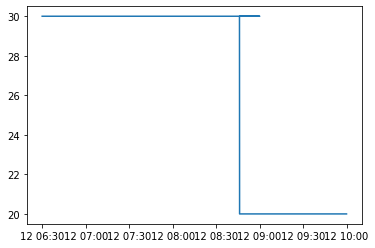

In [76]:
plt.plot(df_1['244B_MachineModes.ModeMaster'])

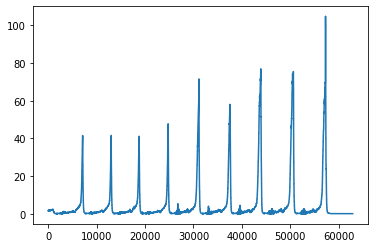

In [86]:
plt.plot(range(len(df_test)),df_test['244B_CO270.AIn'])

# Auto-Encoder model

In [5]:
class Autoencoder(nn.Module):
    def __init__(self, output_len = 10,**kwargs):
        super().__init__()
        self.output_len = output_len
        self.batch,self.a,self.b = kwargs["input_shape"]
        self.layer_dim = 3
        self.hidden_dim = 16
        self.encoder = nn.LSTM(self.b, hidden_size = self.hidden_dim, num_layers=self.layer_dim, batch_first=True)
        self.hidden = nn.Linear(self.hidden_dim*self.a, 16*self.a)
        self.decoder = nn.Linear(16*self.a, self.output_len*self.a)

    def forward(self, x):
        batch = x.shape[0]
        x, (hn,cn) = self.encoder(x)
        x = x.reshape((batch,-1))
        #print(x.shape)
        x = self.hidden(x)
        x = self.decoder(x)
        out = x.view(batch,self.a,self.output_len)
        return out

In [6]:
model = Autoencoder(input_shape=(32,200,12))
inp = torch.randn(32,200,12)
out = model(inp)
print(out.shape)

torch.Size([32, 200, 10])


In [7]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
pytorch_total_params

16651472

# Training and validation

In [78]:
# Data preparation
l = 200
data = []
for i in range(0,len(df_test)-200,l):
    #if i!=527400: # removing anomaly data
        data.append(np.array(df_test[target_column][i:i+l]))
train_length = 9*len(data)//10
test_length = len(data)-train_length

data = np.array(data)
print(data.shape)
# train_data = np.array(data[:train_length],dtype = 'float')
# test_data = np.array(data[train_length:],dtype = 'float')
# train_data.shape, test_data.shape

(314, 200, 10)


In [28]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = Autoencoder(device = device,input_shape = (32,200,10))
model = model.to(device)
model.load_state_dict(torch.load('saved_models/auto_wo_clb_best.pt'))

<All keys matched successfully>

In [29]:
threshold = 4.06
optimizer = optim.Adam(model.parameters(), lr=1e-3)
# mean-squared error loss
criterion = nn.MSELoss()

In [79]:
def predict(model, data, threshold):
    dl = torch.utils.data.DataLoader(data, batch_size=1, shuffle=False, num_workers=2)
    anomalous = []
    errors = []
    model.eval()
    with torch.no_grad():
        for idx,batch_features in enumerate(dl):
            batch_features = torch.from_numpy(batch_features.numpy()).float().to(device)
            outputs = model(batch_features)
            test_loss = criterion(outputs, batch_features).item()
            errors.append(test_loss)
            if test_loss>threshold:
                anomalous.append(idx)
    #return anomalous,outputs.cpu().numpy(), batch_features.cpu().numpy()
    return anomalous,errors

In [80]:
anomaly, errors = predict(model, data, threshold)

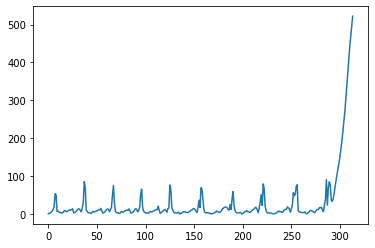

In [81]:
plt.plot(errors)

In [94]:
def reconstruct(model, data):
    dl = torch.utils.data.DataLoader(data, batch_size=32, shuffle=False, num_workers=2)
    
    errors = []
    model.eval()
    with torch.no_grad():
        for idx,batch_features in enumerate(dl):
            batch_features = torch.from_numpy(batch_features.numpy()).float().to(device)
            outputs = model(batch_features)
            test_loss = criterion(outputs, batch_features).item()
            errors.append(test_loss)
    return errors,outputs.cpu().numpy(), batch_features.cpu().numpy()
error,reconstructions,data1 = reconstruct(model, data[280:300])
print(error)

[58.17059326171875]


In [95]:
df_test.columns

Index(['244B_TE116.AIn', '244B_TE117.AIn', '244B_TE118.AIn', '244B_TE200.AIn',
       '244B_TE201.AIn', '244B_TE202.AIn', '244B_SC220.SpdFB',
       '244B_SC220.SpdSP', '244B_CO270.AIn', '244B_PDT100.AIn'],
      dtype='object')

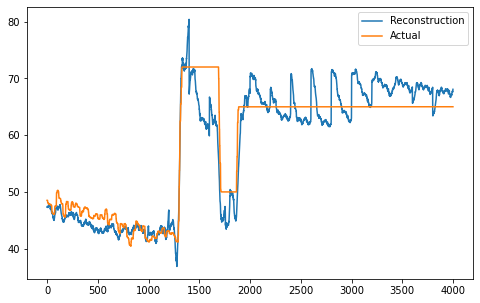

In [104]:
plt.figure(figsize = (8,5))
ind = list(df_test.columns).index('244B_SC220.SpdFB')
plt.plot(reconstructions[:,:,ind].reshape(-1,1),label = 'Reconstruction')
plt.plot(data1[:,:,ind].reshape(-1,1), label = 'Actual')
plt.legend()
plt.show()

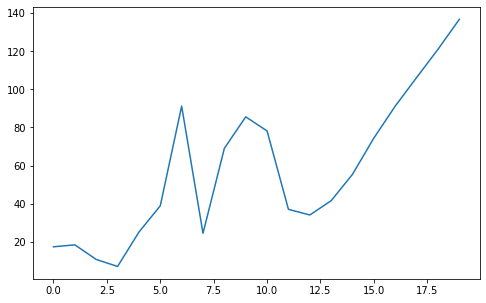

In [98]:
plt.figure(figsize = (8,5))
plt.plot(errors[280:300])

In [45]:
def get_threshold(model, criterion,train_loader):
    model.eval()
    with torch.no_grad():
        train_loss = []
        for idx,batch_features in enumerate(train_loader):
            batch_features = torch.from_numpy(batch_features.numpy()).float().to(device)
            outputs = model(batch_features)
            loss = criterion(outputs, batch_features).item()
            train_loss.append(loss)
        train_loss = np.array(train_loss)
    threshold = np.mean(train_loss) + np.std(train_loss)
    print('Threshold:', threshold)
    return threshold

In [46]:
threshold = get_threshold(model, criterion,train_loader)

Threshold: 4.060076478412851


In [39]:
def predict(model, data, threshold):
    dl = torch.utils.data.DataLoader(data, batch_size=32, shuffle=False, num_workers=2)
    anomalous = []
    model.eval()
    with torch.no_grad():
        for idx,batch_features in enumerate(dl):
            batch_features = torch.from_numpy(batch_features.numpy()).float().to(device)
            outputs = model(batch_features)
            test_loss = criterion(outputs, batch_features).item()
            if test_loss>threshold:
                anomalous.append(idx*32)
    return anomalous

In [49]:
# if list is empty, there is no anomaly
# number i in anomaly list indicates that data[i:i+32*200] contain anomalous data

anomaly = predict(model, test_data, threshold*1.2)
anomaly

[]

In [45]:
data1 = np.array(df[target_column][94600:94800])
data1 = data1.reshape((1,200,12))
anomaly = predict(model, data1, threshold*1.3)
anomaly

[0]

In [48]:
anomaly = predict(model, train_data, threshold*1.2)
anomaly

[]

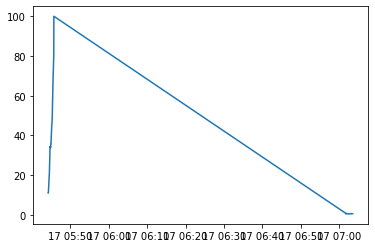

In [54]:
plt.plot(df['244B_CO270.AIn'][94600:94800])

In [53]:
for i in range(900,999):
    data1 = np.array(df[target_column][i*100:i*100+200])
    data1 = data1.reshape((1,200,12))
    anomaly = predict(model, data1, threshold*1.3)
    if len(anomaly)>0:
        print(i,end = ' ')

930 938 939 946 947 954 955 956 963 964 971 972 979 980 994 995 

In [34]:
def train_model(model,criterion,optimizer,epochs=5):
    hist = {'loss':[], 'val_loss': []}
    for epoch in range(epochs):
        loss = 0
        print(f'Epoch: {epoch+1}/{epochs}')
        print('-'*25)
        model.train()
        for batch_features in train_loader:
            batch_features = torch.from_numpy(batch_features.numpy()).float().to(device)
            optimizer.zero_grad()

            outputs = model(batch_features)

            train_loss = criterion(outputs, batch_features)
            train_loss.backward()
            optimizer.step()
            loss += train_loss.item()

        loss = loss / len(train_loader)
        hist['loss'].append(loss)
        
        model.eval()
        with torch.no_grad():
            val_loss = 0
            for batch_features in test_loader:
                batch_features = torch.from_numpy(batch_features.numpy()).float().to(device)
                outputs = model(batch_features)
                val_loss += criterion(outputs, batch_features).item()
        val_loss/=len(test_loader)
        hist['val_loss'].append(val_loss)
        # display the epoch training loss
        print(f"loss = {loss}, val_loss = {val_loss}")
    return hist

In [57]:
hist = train_model(model,criterion,optimizer,epochs=25)

Epoch: 1/25
-------------------------
loss = 554.6658113823562, val_loss = 198.3145751953125
Epoch: 2/25
-------------------------
loss = 121.79646964151351, val_loss = 101.42824227469308
Epoch: 3/25
-------------------------


KeyboardInterrupt: 

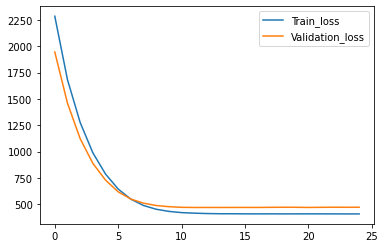

In [24]:
plt.plot(range(len(hist['loss'])), hist['loss'], label = 'Train_loss')
plt.plot(range(len(hist['loss'])), hist['val_loss'], label = 'Validation_loss')
plt.legend()
plt.show()